<a href="https://colab.research.google.com/github/Gopizone/DataScience/blob/main/AirQlty_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 3000)
from scipy import interpolate
import matplotlib.pyplot as plt
df = pd.read_csv('delhi.csv')

In [ ]:
df.describe()

,date,pm25
count,2374,2374
unique,2374,436
top,15-02-2018 00:00,-
freq,1,80


In [ ]:
df.dtypes

date    object
pm25    object
dtype: object

In [ ]:
df['date_Duplicate']=df['date']
df['date']=pd.to_datetime(df['date'])
df['date_Duplicate']=pd.to_datetime(df['date_Duplicate'])
df = df.set_index('date')
df['pm25'] = df['pm25'].replace('-',np.nan)
df['pm25']=df['pm25'].astype(str).astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2374 entries, 2018-04-20 00:00:00 to 2018-01-01 00:00:00
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pm25            2294 non-null   float64       
 1   date_Duplicate  2374 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 55.6 KB


In [ ]:
df.dtypes

pm25                     float64
date_Duplicate    datetime64[ns]
dtype: object

## Handling missing values 

In [ ]:
df = df.assign(Mean=df.pm25.fillna(df.pm25.mean()))
df = df.assign(Median=df.pm25.fillna(df.pm25.median()))
df = df.assign(RollingMean=df.pm25.fillna(df.pm25.rolling(50,min_periods=1,).mean()))
df = df.assign(RollingMedian=df.pm25.fillna(df.pm25.rolling(50,min_periods=1,).median()))
df = df.assign(Linear=df.pm25.interpolate(method='linear'))
df = df.assign(Time=df.pm25.interpolate(method='time'))
df = df.assign(Quadratic=df.pm25.interpolate(method='quadratic'))
df = df.assign(Cubic=df.pm25.interpolate(method='cubic'))
df = df.assign(Poly_order5=df.pm25.interpolate(method='polynomial', order=5)) 
df = df.assign(Poly_order7=df.pm25.interpolate(method='polynomial', order=7))

In [ ]:
df

,pm25,date_Duplicate,Mean,Median,RollingMean,RollingMedian,Linear,Time,Quadratic,Cubic,Poly_order5,Poly_order7
date,,,,,,,,,,,,
2018-04-20 00:00:00,92.0,2018-04-20 00:00:00,92.000000,92.0,92.000000,92.0,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
2018-04-19 23:00:00,89.0,2018-04-19 23:00:00,89.000000,89.0,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
2018-04-19 22:00:00,75.0,2018-04-19 22:00:00,75.000000,75.0,75.000000,75.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
2018-04-19 21:00:00,57.0,2018-04-19 21:00:00,57.000000,57.0,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
2018-04-19 20:00:00,57.0,2018-04-19 20:00:00,57.000000,57.0,57.000000,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
2018-04-19 19:00:00,29.0,2018-04-19 19:00:00,29.000000,29.0,29.000000,29.0,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
2018-04-19 18:00:00,40.0,2018-04-19 18:00:00,40.000000,40.0,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
2018-04-19 17:00:00,33.0,2018-04-19 17:00:00,33.000000,33.0,33.000000,33.0,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
2018-04-19 16:00:00,66.0,2018-04-19 16:00:00,66.000000,66.0,66.000000,66.0,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000


In [ ]:
for method in list(df.columns)[2:]:
    df.loc[df[method]< 0, method] = 0

In [ ]:
df_Jan=df.loc[(df['date_Duplicate'].dt.day >= 23) & (df['date_Duplicate'].dt.day <= 27) & (df['date_Duplicate'].dt.month == 1)] 
df_Jan

,pm25,date_Duplicate,Mean,Median,RollingMean,RollingMedian,Linear,Time,Quadratic,Cubic,Poly_order5,Poly_order7
date,,,,,,,,,,,,
2018-01-27 23:00:00,403.0,2018-01-27 23:00:00,403.000000,403.0,403.000000,403.0,403.000000,403.0,403.000000,403.0,403.0,403.0
2018-01-27 22:00:00,322.0,2018-01-27 22:00:00,322.000000,322.0,322.000000,322.0,322.000000,322.0,322.000000,322.0,322.0,322.0
2018-01-27 21:00:00,301.0,2018-01-27 21:00:00,301.000000,301.0,301.000000,301.0,301.000000,301.0,301.000000,301.0,301.0,301.0
2018-01-27 20:00:00,308.0,2018-01-27 20:00:00,308.000000,308.0,308.000000,308.0,308.000000,308.0,308.000000,308.0,308.0,308.0
2018-01-27 19:00:00,320.0,2018-01-27 19:00:00,320.000000,320.0,320.000000,320.0,320.000000,320.0,320.000000,320.0,320.0,320.0
2018-01-27 18:00:00,225.0,2018-01-27 18:00:00,225.000000,225.0,225.000000,225.0,225.000000,225.0,225.000000,225.0,225.0,225.0
2018-01-27 17:00:00,169.0,2018-01-27 17:00:00,169.000000,169.0,169.000000,169.0,169.000000,169.0,169.000000,169.0,169.0,169.0
2018-01-27 16:00:00,322.0,2018-01-27 16:00:00,322.000000,322.0,322.000000,322.0,322.000000,322.0,322.000000,322.0,322.0,322.0
2018-01-27 15:00:00,380.0,2018-01-27 15:00:00,380.000000,380.0,380.000000,380.0,380.000000,380.0,380.000000,380.0,380.0,380.0


In [ ]:
RN=[]
for i in range(0,df_Jan.Mean.count()):
    RN.append(i)

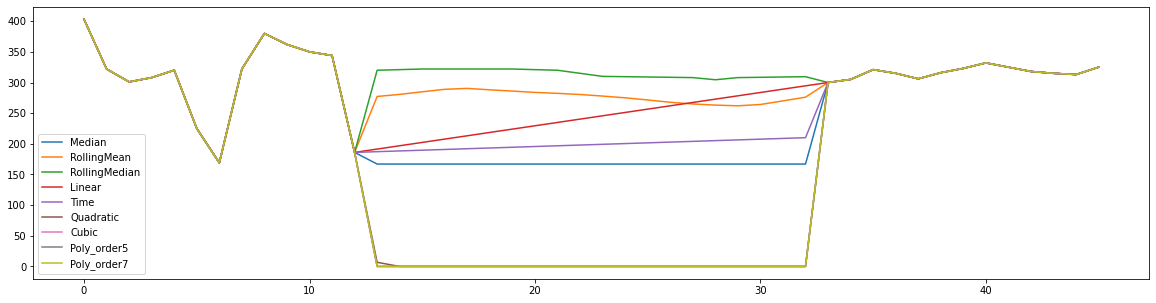

In [ ]:
labels = []
plt.figure(figsize=(20,5))

for method in list(df.columns)[3:]:
    plt.plot(RN, df_Jan[method])
    labels.append(method)
plt.legend(labels)